In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [3]:
# loading bank data 
bank = pd.read_csv("bank-full.csv")
bank 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

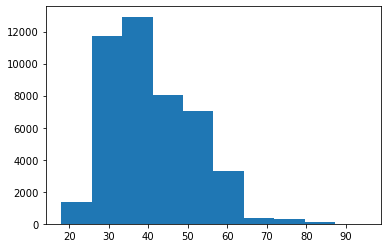

In [6]:
plt.hist(bank["age"])

<AxesSubplot:xlabel='job', ylabel='count'>

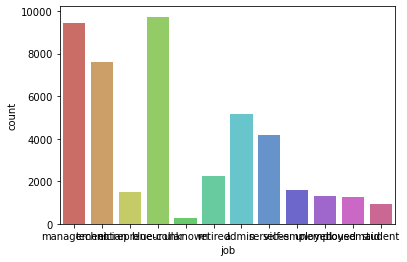

In [7]:
sb.countplot(x="job",data=bank,palette="hls")

<AxesSubplot:xlabel='marital', ylabel='count'>

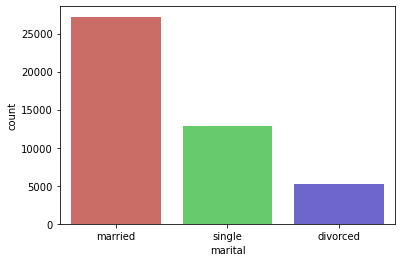

In [8]:
sb.countplot(x="marital",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

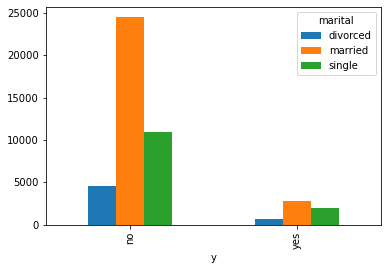

In [9]:
pd.crosstab(bank.y,bank.marital).plot(kind = 'bar')  

<AxesSubplot:xlabel='education', ylabel='count'>

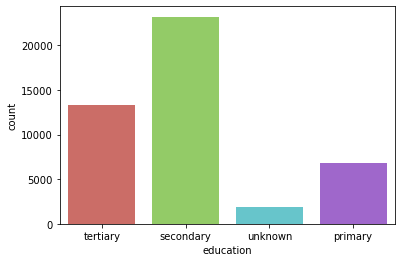

In [10]:
sb.countplot(x="education",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

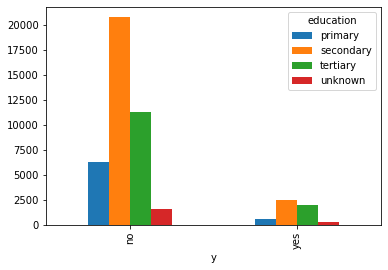

In [11]:
pd.crosstab(bank.y,bank.education).plot(kind = 'bar')  

<AxesSubplot:xlabel='default', ylabel='count'>

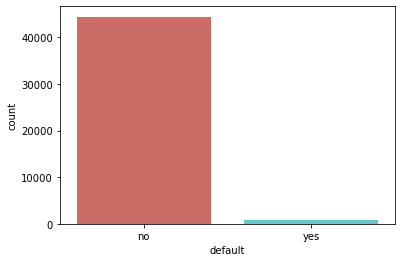

In [12]:
sb.countplot(x="default",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

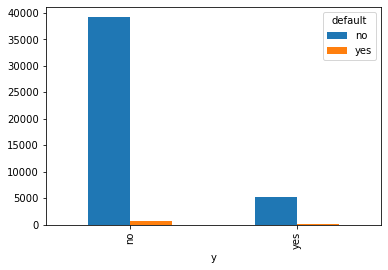

In [13]:
pd.crosstab(bank.y,bank.default).plot(kind = 'bar')  

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

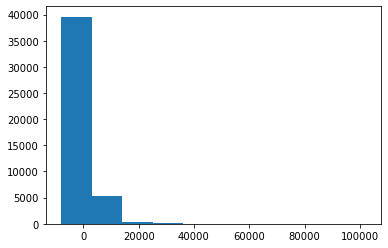

In [14]:
plt.hist(bank["balance"])

<AxesSubplot:xlabel='housing', ylabel='count'>

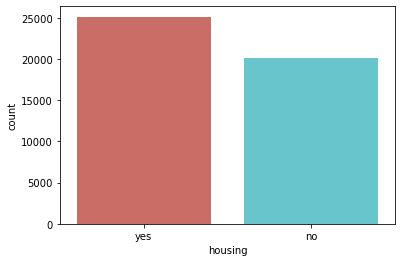

In [15]:
sb.countplot(x="housing",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

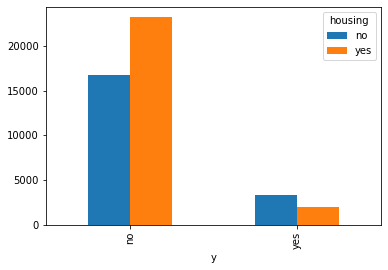

In [16]:
pd.crosstab(bank.y,bank.housing).plot(kind = 'bar')  

<AxesSubplot:xlabel='loan', ylabel='count'>

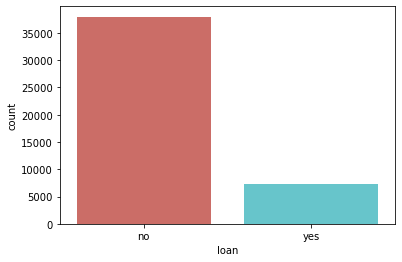

In [17]:
sb.countplot(x="loan",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

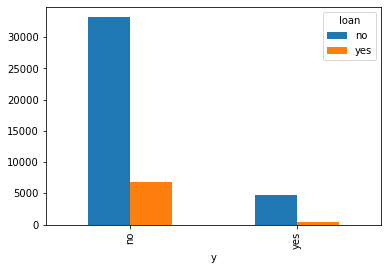

In [18]:
pd.crosstab(bank.y,bank.loan).plot(kind = 'bar')  

<AxesSubplot:xlabel='contact', ylabel='count'>

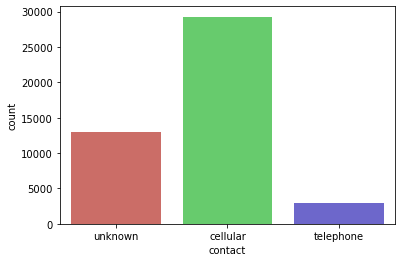

In [19]:
sb.countplot(x="contact",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

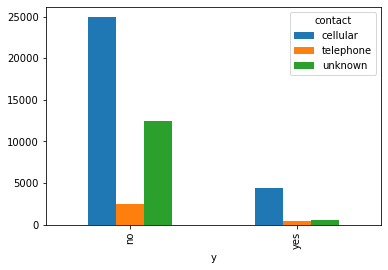

In [20]:
pd.crosstab(bank.y,bank.contact).plot(kind = 'bar')  

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddfe51490>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddfe51af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ddfe511c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddfe51fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddfe5d2e0>],
 'means': []}

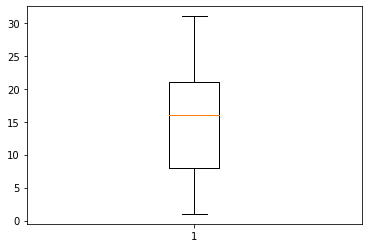

In [21]:
plt.boxplot(bank["day"])

<AxesSubplot:xlabel='month', ylabel='count'>

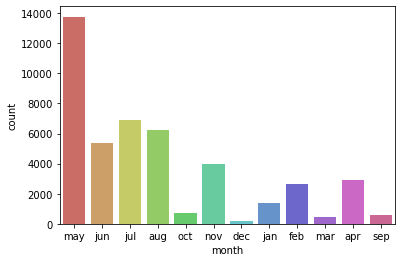

In [22]:
sb.countplot(x="month",data=bank,palette="hls")

(array([3.9677e+04, 4.4250e+03, 8.6500e+02, 1.7600e+02, 4.3000e+01,
        1.1000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

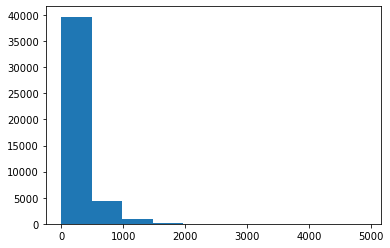

In [23]:
plt.hist(bank["duration"])

(array([4.2882e+04, 1.6220e+03, 4.2000e+02, 1.6500e+02, 7.5000e+01,
        3.3000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

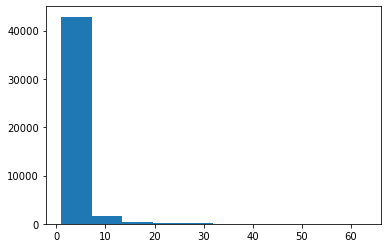

In [24]:
plt.hist(bank["campaign"])

(array([3.7516e+04, 2.2990e+03, 2.1540e+03, 1.8250e+03, 1.2290e+03,
        9.8000e+01, 3.9000e+01, 1.8000e+01, 1.8000e+01, 1.5000e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

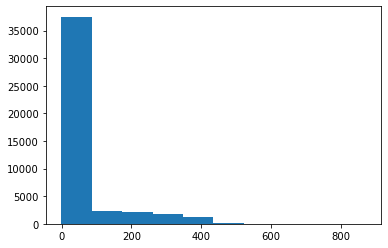

In [25]:
plt.hist(bank["pdays"])

(array([4.519e+04, 1.800e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  27.5,  55. ,  82.5, 110. , 137.5, 165. , 192.5, 220. ,
        247.5, 275. ]),
 <BarContainer object of 10 artists>)

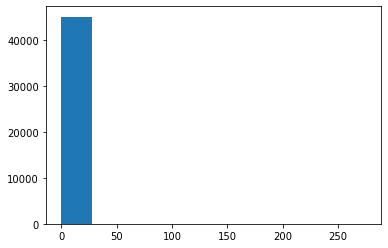

In [26]:
plt.hist(bank["previous"])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

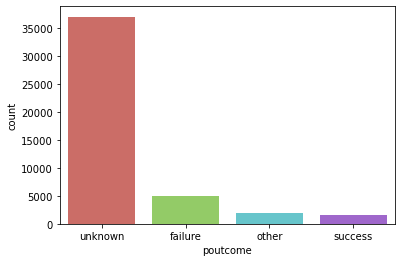

In [27]:
sb.countplot(x="poutcome",data=bank,palette="hls")

<AxesSubplot:xlabel='y'>

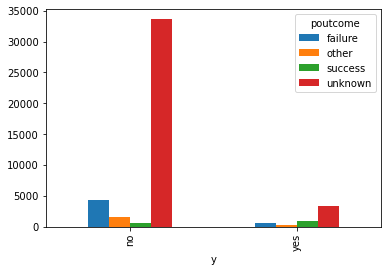

In [28]:
pd.crosstab(bank.y,bank.poutcome).plot(kind = 'bar')  

<AxesSubplot:xlabel='y', ylabel='count'>

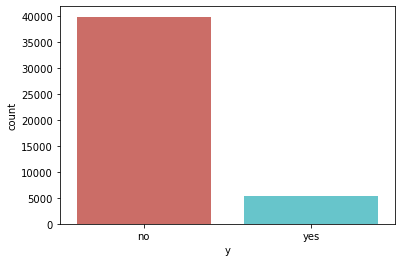

In [29]:
sb.countplot(x="y",data=bank,palette="hls")

In [30]:
## Data Pre Processing/transformation

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

bank["y"] = LE.fit_transform(bank["y"])
bank["y"]

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [31]:
bank["job"] = LE.fit_transform(bank["job"])
bank["job"]

0         4
1         9
2         2
3         1
4        11
         ..
45206     9
45207     5
45208     5
45209     1
45210     2
Name: job, Length: 45211, dtype: int32

In [32]:
bank["marital"] = LE.fit_transform(bank["marital"])
bank["marital"]

0        1
1        2
2        1
3        1
4        2
        ..
45206    1
45207    0
45208    1
45209    1
45210    1
Name: marital, Length: 45211, dtype: int32

In [33]:
bank["education"] = LE.fit_transform(bank["education"])
bank["education"]

0        2
1        1
2        1
3        3
4        3
        ..
45206    2
45207    0
45208    1
45209    1
45210    1
Name: education, Length: 45211, dtype: int32

In [34]:
bank["default"] = LE.fit_transform(bank["default"])
bank["default"]

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int32

In [35]:
bank["housing"] = LE.fit_transform(bank["housing"])
bank["housing"]

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: housing, Length: 45211, dtype: int32

In [36]:
bank["loan"] = LE.fit_transform(bank["loan"])
bank["loan"]

0        0
1        0
2        1
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, Length: 45211, dtype: int32

In [37]:
bank["contact"] = LE.fit_transform(bank["contact"])
bank["contact"]

0        2
1        2
2        2
3        2
4        2
        ..
45206    0
45207    0
45208    0
45209    1
45210    0
Name: contact, Length: 45211, dtype: int32

In [38]:
bank["month"] = LE.fit_transform(bank["month"])
bank["month"]

0        8
1        8
2        8
3        8
4        8
        ..
45206    9
45207    9
45208    9
45209    9
45210    9
Name: month, Length: 45211, dtype: int32

In [39]:
bank["poutcome"] = LE.fit_transform(bank["poutcome"])
bank["poutcome"]

0        3
1        3
2        3
3        3
4        3
        ..
45206    3
45207    3
45208    2
45209    3
45210    1
Name: poutcome, Length: 45211, dtype: int32

In [40]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank.shape   

(45211, 17)

In [41]:
X = bank.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
Y = bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y) 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
classifier.coef_  # coefficients of features  

array([[-3.16727173e-02,  1.45329392e-02, -9.21053015e-02,
        -1.31806092e-02, -4.79229148e-03,  3.99848580e-05,
        -1.81544845e-01, -5.34880697e-02, -1.86706458e-01,
        -8.41516108e-03, -6.01297714e-02,  3.27072464e-03,
        -2.66999527e-01, -1.23891882e-03,  1.19974604e-01,
        -1.80532482e-01]])

In [43]:
classifier.predict_proba (X) # Probability values  

array([[0.94853108, 0.05146892],
       [0.94887901, 0.05112099],
       [0.94695864, 0.05304136],
       ...,
       [0.67200407, 0.32799593],
       [0.94034392, 0.05965608],
       [0.58201197, 0.41798803]])

In [44]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [45]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.948531,0.051469
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.948879,0.051121
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.946959,0.053041
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.960855,0.039145
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.903421,0.096579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0,0.615520,0.384480
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.920166,0.079834
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0,0.672004,0.327996
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.940344,0.059656


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 


[[39279   643]
 [ 4438   851]]


In [47]:
pd.crosstab(y_pred,Y)

y,0,1
row_0,,
0,39279,4438
1,643,851


In [48]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8876158457012674

In [49]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.5723967867991099

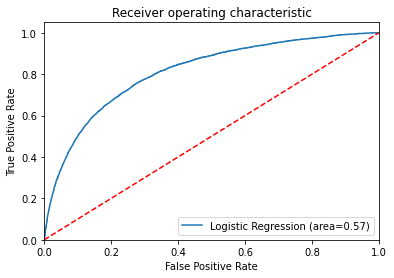

In [51]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [52]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [53]:
y_prob1

,0
0,0.051469
1,0.051121
2,0.053041
3,0.039145
4,0.096579
...,...
45206,0.384480
45207,0.079834
45208,0.327996
45209,0.059656


In [54]:
import statsmodels.api as sm  

In [55]:
logit = sm.Logit(Y, X)   

In [56]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.2342
Time:                        19:09:06   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

In [57]:
fpr

array([0.00000000e+00, 2.50488452e-05, 1.00195381e-04, ...,
       9.97795702e-01, 9.97795702e-01, 1.00000000e+00])

In [58]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

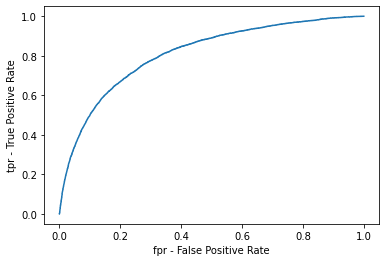

In [59]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

plt.ylabel('tpr - True Positive Rate')

plt.xlabel('fpr - False Positive Rate')

plt.show()

In [60]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
819,4.853295e-01,0.887771
824,4.849414e-01,0.887771
822,4.851003e-01,0.887771
820,4.852101e-01,0.887771
825,4.848479e-01,0.887771
...,...,...
7780,4.628613e-04,0.122824
7781,4.611922e-04,0.122802
7782,5.658888e-05,0.118931
7783,5.456473e-05,0.118909


In [61]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.118100


In [62]:
ix

5365

In [63]:
threshold = 0.118100
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))   

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     39922
           1       0.27      0.76      0.39      5289

    accuracy                           0.73     45211
   macro avg       0.61      0.74      0.61     45211
weighted avg       0.88      0.73      0.77     45211

